In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

file = 'LabSessionData.xlsx'

# Q1: Load purchase data
purchase = pd.read_excel(file, sheet_name='Purchase data')
A = purchase.iloc[:, :-1].apply(pd.to_numeric, errors='coerce').fillna(0).values  
C = purchase.iloc[:, -1].values   


In [2]:
# Q1: Vector space analysis
dim = A.shape[1]
vecCount = A.shape[0]
rankA = np.linalg.matrix_rank(A)



In [3]:
# Q2: Pseudo-inverse for cost
APinv = np.linalg.pinv(A)
X = APinv @ C



In [4]:
# Q3: Customer classification
purchase['Class'] = ['RICH' if x > 200 else 'POOR' for x in purchase.iloc[:, -1]]



In [5]:
# Q4: Load stock data
stock = pd.read_excel(file, sheet_name='IRCTC Stock Price')
D = stock.iloc[:, 3]

# Q4: Price data statistics
meanD = statistics.mean(D)
varD = statistics.variance(D)

# Q4: Wednesdays sample mean
weds = stock[stock['Day'].astype(str).str.lower() == 'wednesday'].iloc[:, 3]
if not weds.empty:
    wedsMean = statistics.mean(weds)
else:
    wedsMean = None  # Handle missing data

# Q4: Probability calculations
chg = stock.iloc[:, 8]
lossProb = sum(chg < 0) / len(chg)
profitProb = sum(chg > 0) / len(chg)

weds_count = sum(stock['Day'] == 'Wednesday')
if weds_count > 0:
    wedsProfitProb = sum((chg > 0) & (stock['Day'] == 'Wednesday')) / weds_count
else:
    wedsProfitProb = None  



In [6]:
# Q5: Data Exploration
thyroid = pd.read_excel(file, sheet_name='thyroid0387_UCI')

for col in thyroid.columns:
    if thyroid[col].isnull().sum() > 0:
        if thyroid[col].nunique() > 10:
            thyroid[col].fillna(thyroid[col].median(), inplace=True)
        else:
            thyroid[col].fillna(thyroid[col].mean(), inplace=True)



In [7]:
# Q7: Data Normalization
for col in thyroid.select_dtypes(include=[np.number]):
    thyroid[col] = (thyroid[col] - thyroid[col].min()) / (thyroid[col].max() - thyroid[col].min())



In [8]:
# Q8: Similarity Measure
vec1 = thyroid.iloc[0, :].values
vec2 = thyroid.iloc[1, :].values

vec1 = np.nan_to_num(pd.to_numeric(vec1, errors='coerce'))
vec2 = np.nan_to_num(pd.to_numeric(vec2, errors='coerce'))

jc_denominator = np.sum((vec1 == 1) | (vec2 == 1))
jc = np.sum((vec1 == 1) & (vec2 == 1)) / jc_denominator if jc_denominator != 0 else 0
smc_denominator = len(vec1)
smc = np.sum(vec1 == vec2) / smc_denominator if smc_denominator != 0 else 0

if np.linalg.norm(vec1) != 0 and np.linalg.norm(vec2) != 0:
    cosSim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
else:
    cosSim = 0



In [9]:
# Q9: Cosine Similarity
cosSim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))



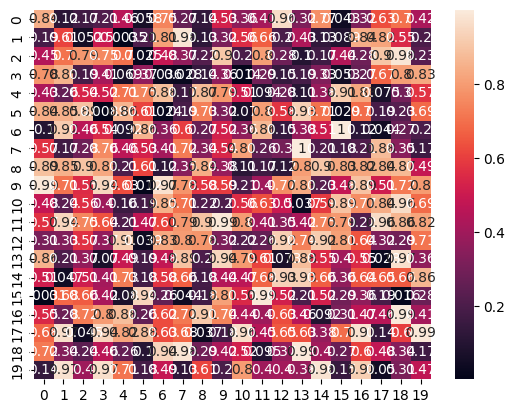

In [10]:
# Q10: Heatmap of similarity metrics
data = np.random.rand(20, 20)  
sns.heatmap(data, annot=True)
plt.show()